# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

The chromedriver version (130.0.6723.116) detected in PATH at /opt/homebrew/bin/chromedriver might not be compatible with the detected chrome version (131.0.6778.71); currently, chromedriver 131.0.6778.85 is recommended for chrome 131.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
# Finding table first
table = mars_soup.find('table')
# Extract all rows of the table
rows = table.find_all('tr')
# Extracting the headers of the table
headers = [header.text.strip() for header in rows[0].find_all('th')]
# For loop to extract the remaining data
table_data = []
for row in rows[1:]:
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    table_data.append(row_data)

# verification of collection
print("Headers:", headers)
print("Data:")
for row in table_data:
    print(row)

Headers: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
Data:
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '7

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_data_list = []
# Loop through the scraped data to create a list of rows
for row in table_data:
    # Defining the dictionary for the rows
    row_dict = dict(zip(headers, row))
    # Appending the above dictionary to the list
    mars_data_list.append(row_dict)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(mars_data_list, columns=headers)

In [8]:
# Confirm DataFrame was created successfully
mars_data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_data_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
mars_data_df['id'] = mars_data_df['id'].astype(int)
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'])
mars_data_df['sol'] = mars_data_df['sol'].astype(int)
mars_data_df['ls'] = mars_data_df['ls'].astype(float)
mars_data_df['month'] = mars_data_df['month'].astype(int)
mars_data_df['min_temp'] = mars_data_df['min_temp'].astype(float)
mars_data_df['pressure'] = mars_data_df['pressure'].astype(float)


In [11]:
# Confirm type changes were successful by examining data types again
print(mars_data_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
unique_months = mars_data_df['month'].nunique()
print(unique_months)

12


In [14]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols = mars_data_df['sol'].nunique()
print(unique_sols)

1867


In [16]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_data_df.groupby('month')['min_temp'].mean()
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


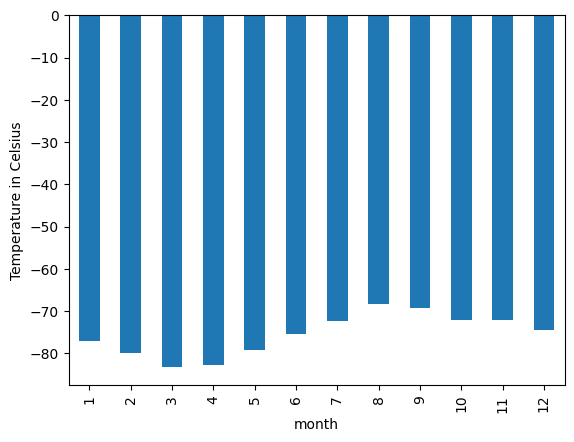

In [17]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot.bar()
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

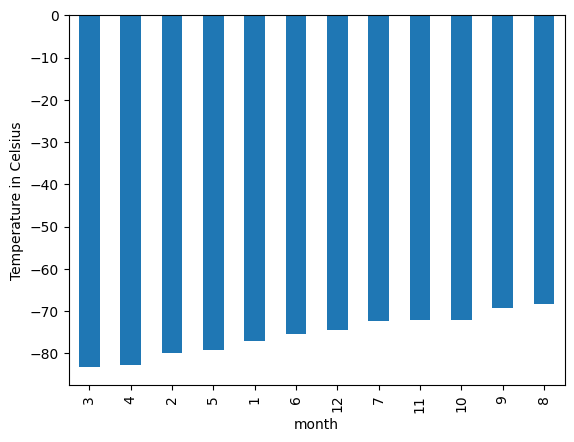

In [20]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
mars_min_temp = avg_min_temp_by_month.sort_values()
mars_min_temp

# Plots for sorted values
mars_min_temp.plot.bar()
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [21]:
# 4. What is the average pressure by month?
mars_avg_pressure = mars_data_df.groupby('month').pressure.agg('mean')
mars_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

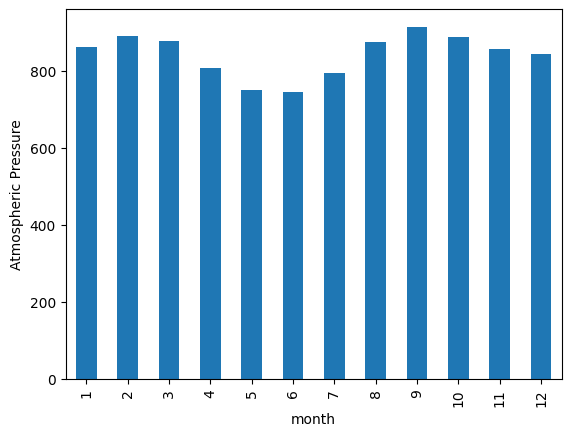

In [22]:
# Plot the average pressure by month
mars_avg_pressure.plot.bar()
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

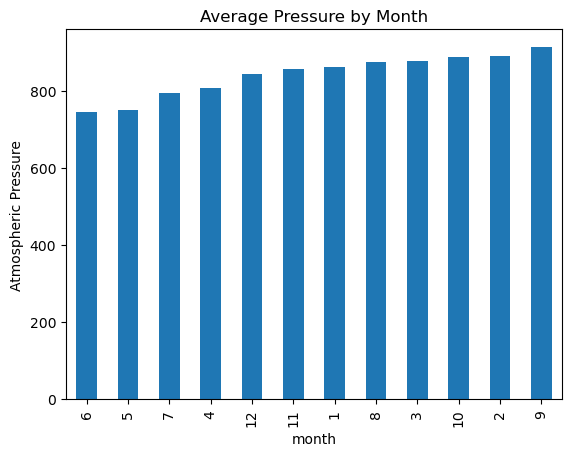

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph


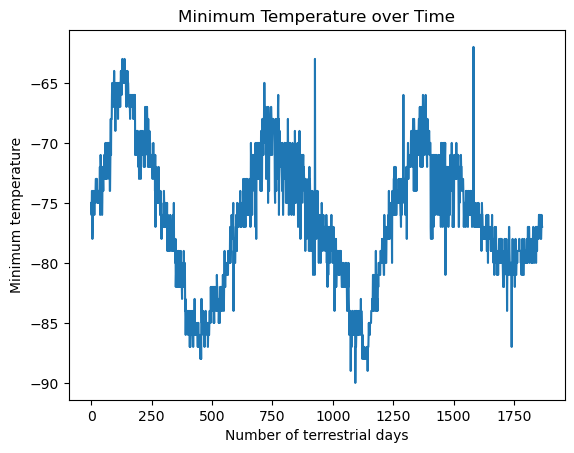

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV


In [22]:
browser.quit()